In [ ]:
import pandas as pd

df = pd.read_csv('SRN_dataset2.csv')
df['sentiment'] = df['sentiment'].map({'positive': 1, 'negative': 0})
print(df.head())

                                              review  sentiment
0  One of the other reviewers has mentioned that ...          1
1  A wonderful little production. <br /><br />The...          1
2  I thought this was a wonderful way to spend ti...          1
3  Basically there's a family where a little boy ...          0
4  Petter Mattei's "Love in the Time of Money" is...          1


In [ ]:
#

In [ ]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize

nltk.download('stopwords', quiet=True)
nltk.download('wordnet', quiet=True)
nltk.download('punkt', quiet=True)
nltk.download('punkt_tab', quiet=True) # Added to fix LookupError

def preprocess_text(text):
    # 1. Convert to lowercase
    text = text.lower()

    # 2. Remove punctuation
    text = re.sub(r'[^À-ſ\w\s]', '', text)

    # 3. Remove numbers
    text = re.sub(r'\d+', '', text)

    # 4. Tokenize
    tokens = word_tokenize(text)

    # 5. Initialize WordNetLemmatizer
    lemmatizer = WordNetLemmatizer()

    # 6. Remove stopwords, lemmatize, and filter non-alphabetic tokens
    stop_words = set(stopwords.words('english'))
    processed_tokens = []
    for token in tokens:
        if token.isalpha() and token not in stop_words:
            processed_tokens.append(lemmatizer.lemmatize(token))

    # 7. Join tokens back into a string
    return ' '.join(processed_tokens)

print("Preprocessing function defined.")
# Test the function with an example from the df
example_review = df['review'].iloc[0]
print(f"\nOriginal review: {example_review}")
print(f"Processed review: {preprocess_text(example_review)}")

Preprocessing function defined.

Original review: One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.<br /><br />The first thing that struck me about Oz was its brutality and unflinching scenes of violence, which set in right from the word GO. Trust me, this is not a show for the faint hearted or timid. This show pulls no punches with regards to drugs, sex or violence. Its is hardcore, in the classic use of the word.<br /><br />It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary. It focuses mainly on Emerald City, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. Em City is home to many..Aryans, Muslims, gangstas, Latinos, Christians, Italians, Irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away.<br /><br />I would

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

# 1. Apply the preprocess_text function to the 'review' column
df['processed_review'] = df['review'].apply(preprocess_text)

# 2. and 3. Instantiate a CountVectorizer object
vectorizer = CountVectorizer()

# 4. Fit the CountVectorizer to the processed_review column and transform the text data
X = vectorizer.fit_transform(df['processed_review'])

# 5. Extract the 'sentiment' column as the target variable
y = df['sentiment']

print("Preprocessing and Feature Extraction Complete.")
print(f"Shape of feature matrix X: {X.shape}")
print(f"Shape of target variable y: {y.shape}")
print("First 5 processed reviews:")
for i in range(5):
    print(f"  {df['processed_review'].iloc[i][:100]}...")

Preprocessing and Feature Extraction Complete.
Shape of feature matrix X: (20, 1007)
Shape of target variable y: (20,)
First 5 processed reviews:
  one reviewer mentioned watching oz episode youll hooked right exactly happened mebr br first thing s...
  wonderful little production br br filming technique unassuming oldtimebbc fashion give comforting so...
  thought wonderful way spend time hot summer weekend sitting air conditioned theater watching lighthe...
  basically there family little boy jake think there zombie closet parent fighting timebr br movie slo...
  petter matteis love time money visually stunning film watch mr mattei offer u vivid portrait human r...


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# 1. Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# 2. Instantiate Logistic Regression model
lr_model = LogisticRegression(max_iter=1000, random_state=42)

# 3. Train the model
lr_model.fit(X_train, y_train)

# 4. Make predictions on the test set
y_pred_lr = lr_model.predict(X_test)

# 5. Calculate evaluation metrics
lr_accuracy = accuracy_score(y_test, y_pred_lr)
lr_precision = precision_score(y_test, y_pred_lr, zero_division=0)
lr_recall = recall_score(y_test, y_pred_lr, zero_division=0)
lr_f1 = f1_score(y_test, y_pred_lr, zero_division=0)

# 6. Print the metrics
print("Logistic Regression Model Performance:")
print(f"  Accuracy: {lr_accuracy:.4f}")
print(f"  Precision: {lr_precision:.4f}")
print(f"  Recall: {lr_recall:.4f}")
print(f"  F1-Score: {lr_f1:.4f}")

Logistic Regression Model Performance:
  Accuracy: 0.6667
  Precision: 0.6000
  Recall: 1.0000
  F1-Score: 0.7500


In [ ]:
from sklearn.svm import LinearSVC

# 1. Instantiate Linear Support Vector Machine model
lsvc_model = LinearSVC(random_state=42, dual=False)

# 2. Train the model
lsvc_model.fit(X_train, y_train)

# 3. Make predictions on the test set
y_pred_lsvc = lsvc_model.predict(X_test)

# 4. Calculate evaluation metrics
lsvc_accuracy = accuracy_score(y_test, y_pred_lsvc)
lsvc_precision = precision_score(y_test, y_pred_lsvc, zero_division=0)
lsvc_recall = recall_score(y_test, y_pred_lsvc, zero_division=0)
lsvc_f1 = f1_score(y_test, y_pred_lsvc, zero_division=0)

# 5. Print the metrics
print("\nLinear Support Vector Machine Model Performance:")
print(f"  Accuracy: {lsvc_accuracy:.4f}")
print(f"  Precision: {lsvc_precision:.4f}")
print(f"  Recall: {lsvc_recall:.4f}")
print(f"  F1-Score: {lsvc_f1:.4f}")

# Comparison
print("\nComparison of Model Performance:")
print("---------------------------------")
print(f"Logistic Regression Accuracy: {lr_accuracy:.4f}")
print(f"LinearSVC Accuracy:         {lsvc_accuracy:.4f}")
print(f"Logistic Regression Precision: {lr_precision:.4f}")
print(f"LinearSVC Precision:         {lsvc_precision:.4f}")
print(f"Logistic Regression Recall: {lr_recall:.4f}")
print(f"LinearSVC Recall:         {lsvc_recall:.4f}")
print(f"Logistic Regression F1-Score: {lr_f1:.4f}")
print(f"LinearSVC F1-Score:         {lsvc_f1:.4f}")


Linear Support Vector Machine Model Performance:
  Accuracy: 0.8333
  Precision: 1.0000
  Recall: 0.6667
  F1-Score: 0.8000

Comparison of Model Performance:
---------------------------------
Logistic Regression Accuracy: 0.6667
LinearSVC Accuracy:         0.8333
Logistic Regression Precision: 0.6000
LinearSVC Precision:         1.0000
Logistic Regression Recall: 1.0000
LinearSVC Recall:         0.6667
Logistic Regression F1-Score: 0.7500
LinearSVC F1-Score:         0.8000


In [ ]:
naive_bayes_accuracy = None  # Placeholder for Naive Bayes model's accuracy, to be integrated for comparison.

print(f"\nNaive Bayes Accuracy (placeholder): {naive_bayes_accuracy}")


Naive Bayes Accuracy (placeholder): None


## Visualize Model Performance Comparison

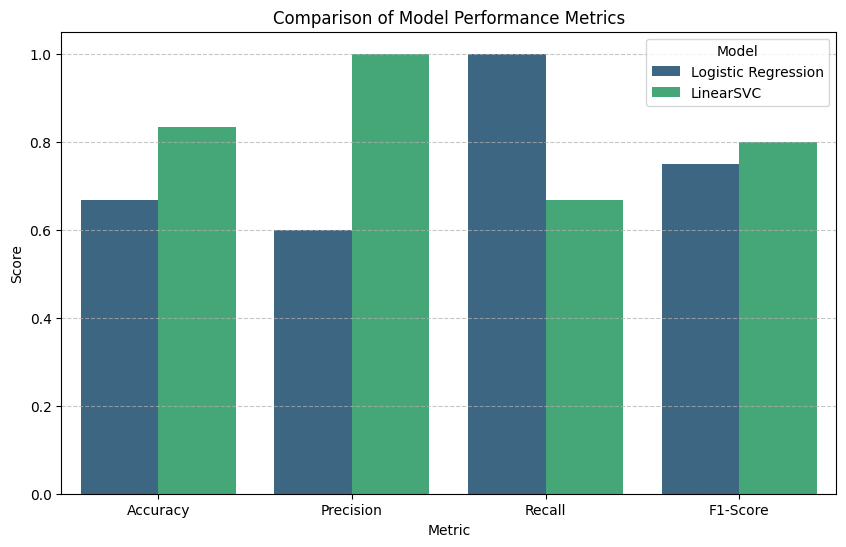

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns # Added seaborn import

# Prepare data for plotting
models = ['Logistic Regression', 'LinearSVC']
accuracies = [lr_accuracy, lsvc_accuracy]
precisions = [lr_precision, lsvc_precision]
recalls = [lr_recall, lsvc_recall]
f1_scores = [lr_f1, lsvc_f1]

metrics_df = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1-Score'],
    'Logistic Regression': [lr_accuracy, lr_precision, lr_recall, lr_f1],
    'LinearSVC': [lsvc_accuracy, lsvc_precision, lsvc_recall, lsvc_f1]
})

metrics_df_melted = metrics_df.melt(id_vars='Metric', var_name='Model', value_name='Score')

# Create a grouped bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x='Metric', y='Score', hue='Model', data=metrics_df_melted, palette='viridis')
plt.title('Comparison of Model Performance Metrics')
plt.ylabel('Score')
plt.ylim(0, 1.05) # Set y-axis limit from 0 to 1 for score comparison
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(title='Model')
plt.show()